downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/cvbook.jpg


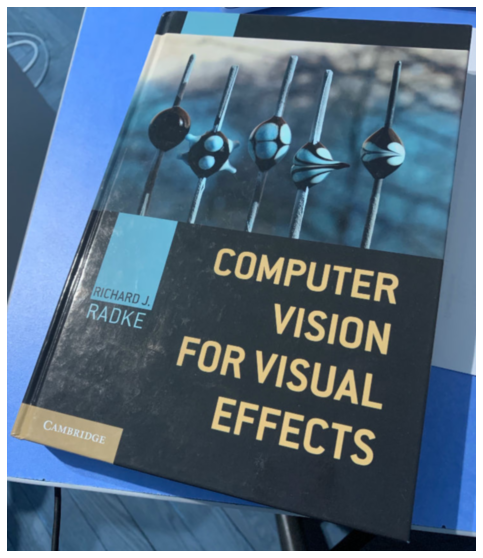

[[ 7.53496708e-01  2.67479949e-01 -1.83197586e+02]
 [-3.99227991e-02  8.41850329e-01  4.57029261e+00]
 [ 3.03922821e-04  6.21097907e-04  1.00000000e+00]]


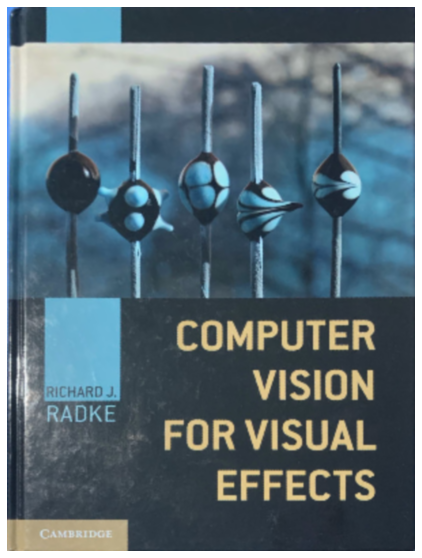

In [2]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt

def url_to_image(url):
    print("downloading %s" % (url))
    return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

def cv2_imshow(img):
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.axis("off")
    plt.show()

url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/cvbook.jpg"
img = url_to_image(url)
cv2_imshow(img)
(r,c) = img.shape[:2]

pts1 = np.float32([[241,6],[726,29],[6,668],[627,837]])
pts2 = np.float32([[0,0],[300,0],[0,400],[300,400]])


# implement this function
M = cv2.getPerspectiveTransform(pts1,pts2)
print(M)

dst = cv2.cv2.warpPerspective(img,M,(300, 400))
cv2_imshow(dst)




In [16]:
X = np.matrix( [ [pts1[0,0], pts1[0,1], 1, 0, 0, 0, 0, 0, 0, -pts2[0,0], 0, 0, 0],
                      [0, 0, 0, pts1[0,0], pts1[0,1], 1, 0, 0, 0, -pts2[0,1], 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, pts1[0,0], pts1[0,1], 1, -1, 0, 0, 0],
                      [pts1[1,0], pts1[1,1], 1, 0, 0, 0, 0, 0, 0, 0, -pts2[1,0],0, 0],
                      [0, 0, 0, pts1[1,0], pts1[1,1], 1, 0, 0, 0, 0, -pts2[1,1], 0, 0],
                      [0, 0, 0, 0, 0, 0, pts1[1,0], pts1[1,1], 1, 0, -1, 0, 0],
                      [pts1[2,0], pts1[2,1], 1, 0, 0, 0, 0, 0, 0, 0, 0, -pts2[2,0], 0],
                      [0, 0, 0, pts1[2,0], pts1[2,1], 1, 0, 0, 0, 0, 0, -pts2[2,1], 0],
                      [0, 0, 0, 0, 0, 0, pts1[2,0], pts1[2,1], 1, 0, 0, -1, 0],
                      [pts1[3,0], pts1[3,1], 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -pts2[3,0]],
                      [0, 0, 0, pts1[3,0], pts1[3,1], 1, 0, 0, 0, 0, 0, 0, -pts2[3,1]],
                      [0, 0, 0, 0, 0, 0, pts1[3,0], pts1[3,1], 1, 0, 0, 0, -1],
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

result = np.array([0,0,0,0,0,0,0,0,0,0,0,0,1])

solution = np.linalg.solve( a = X, b = result.T)
solution /= solution[8]
M1 = solution[0:9].reshape(3,3)

In [17]:
print(M1)
print()
print(M)

print(np.allclose(M,M1))

[[ 7.53496708e-01  2.67479949e-01 -1.83197586e+02]
 [-3.99227991e-02  8.41850329e-01  4.57029261e+00]
 [ 3.03922821e-04  6.21097907e-04  1.00000000e+00]]

[[ 7.53496708e-01  2.67479949e-01 -1.83197586e+02]
 [-3.99227991e-02  8.41850329e-01  4.57029261e+00]
 [ 3.03922821e-04  6.21097907e-04  1.00000000e+00]]
True
